In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import time
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

In [5]:
data = np.load('clusterable_data.npy')

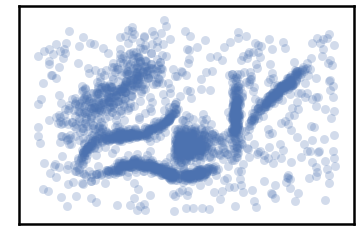

In [6]:
plt.scatter(data.T[0], data.T[1], c='b', **plot_kwds)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)

In [8]:
def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
    plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)

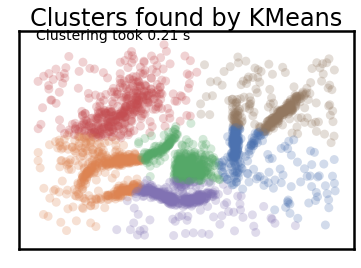

In [23]:
plot_clusters(data, cluster.KMeans, (), {'n_clusters':6})

In [10]:
#natural cluters have been spliced into more globular shapes
#noise points get lumped into a cluster as well
#only takes 0.99 sec so atleast we can be wrong quicky

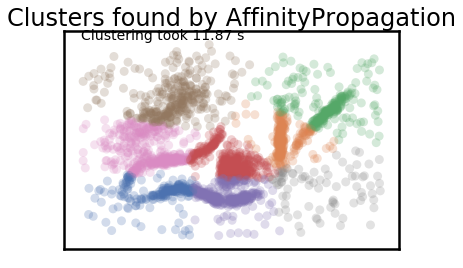

In [24]:
plot_clusters(data, cluster.AffinityPropagation, (), {'preference':-5.0, 'damping':0.95})

In [12]:
#similar to k means (Only slightly better)
#globular clusters lumped together
#noise points have been assigned as well (Bad)
#Took so much time but still turned out to be bad!#

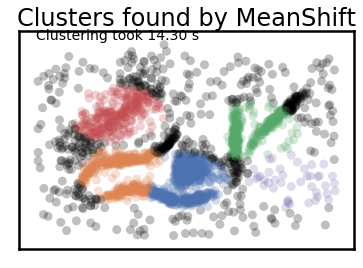

In [25]:
plot_clusters(data, cluster.MeanShift, (0.175,), {'cluster_all':False})

In [17]:
#It has dense regions left out as noise 
#Output is better than k means but takes more time

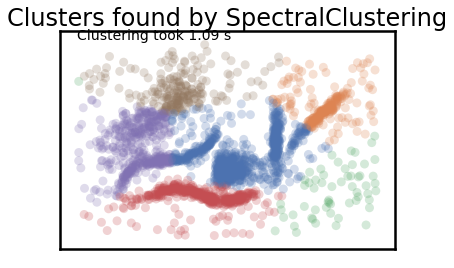

In [26]:
plot_clusters(data, cluster.SpectralClustering, (), {'n_clusters':6})

In [19]:
#performs better on long thin clusters but still ends cutting some of em strangely
#Also, there is the issue of noise polluting the clusters
#Performance is an improvement
#Takes more time than k means but still fast

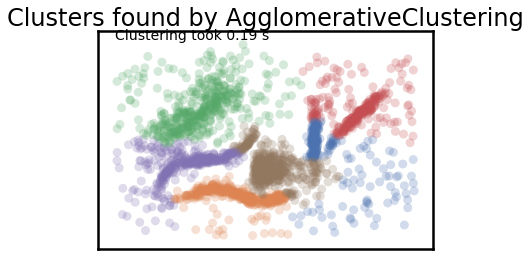

In [27]:
plot_clusters(data, cluster.AgglomerativeClustering, (), {'n_clusters':6, 'linkage':'ward'})

In [ ]:
#long thin clusters are handled better
#still have noise points polluting the cluster
#End result is of good quality

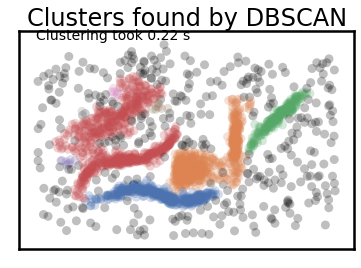

In [28]:
plot_clusters(data, cluster.DBSCAN, (), {'eps':0.025})

In [ ]:
#Does a pretty decent job as acompared to other algorithms
#considered the best since performance is also good 

In [ ]:
#The following is an artificially created data set that is considered as good data for comparing the clustering algorithms.

In [ ]:
#For differences bw each and every algorithm check the notebook